In [2]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [43]:
#Get Stock Quote
df = web.DataReader('GOOG', data_source='stooq', start='2012-01-01', end='2023-12-17')
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-15,132.9200,134.8300,132.6300,133.8400,58594004
2023-12-14,134.7700,135.0350,131.0600,133.2000,29619098
2023-12-13,134.5450,134.7800,132.9500,133.9700,25414461
2023-12-12,133.2700,134.5400,132.8300,133.6400,26583981
2023-12-11,133.8200,134.7900,132.8900,134.7000,24502860
...,...,...,...,...,...
2014-04-02,29.9995,30.2415,28.1095,28.3500,2933940
2014-04-01,27.9355,28.4225,27.9355,28.3580,158640
2014-03-31,28.3445,28.3500,27.8465,27.8485,215440


In [44]:
#Get Number of rows and columns in the data set
df.shape

(2449, 5)

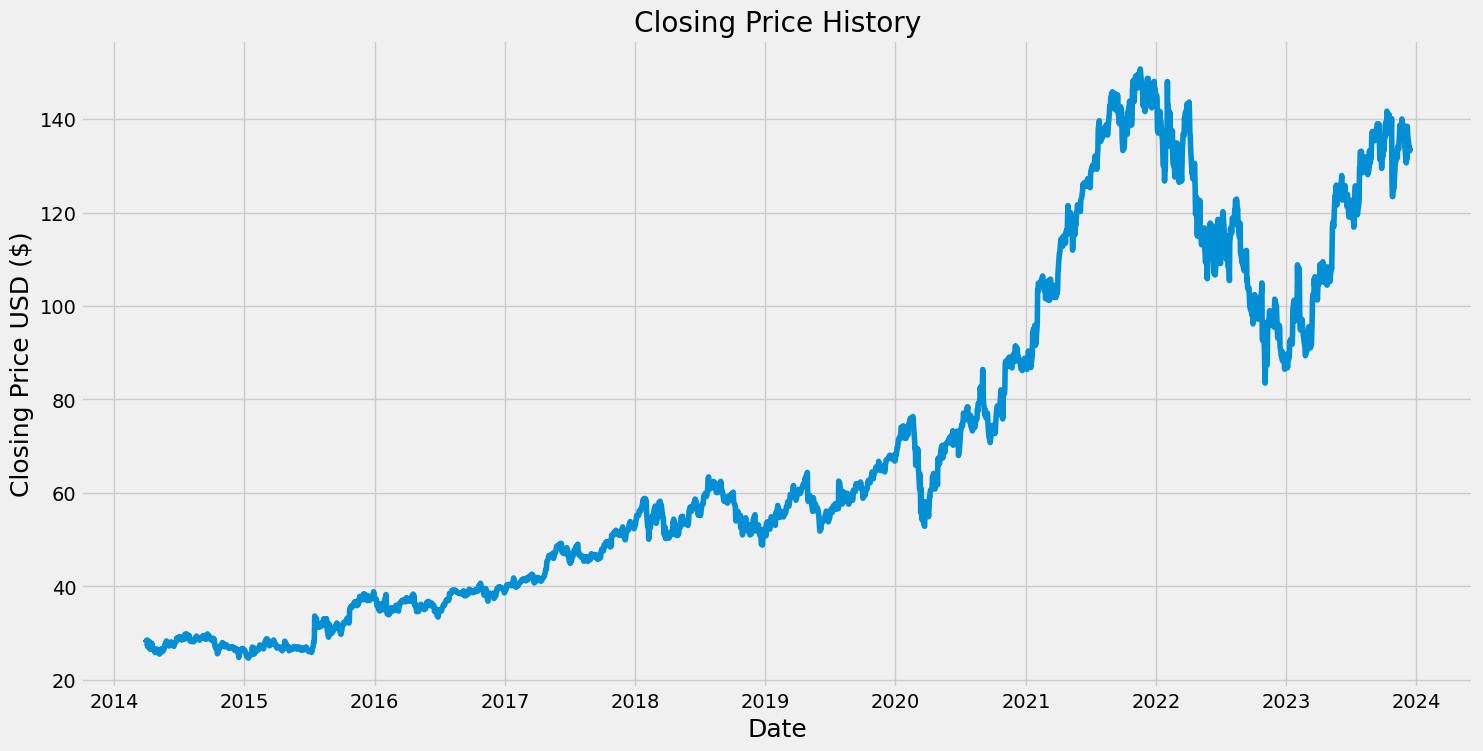

In [47]:
#Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price USD ($)', fontsize = 18)
plt.show()

In [48]:
#Create a new Dataframe with only 'Close' colum
data = df.filter(['Close'])

#Convert the dataframe to numpy array
dataset = data.values

#Number of rows to train model
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1960

In [49]:
#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =  scaler.fit_transform(dataset)
scaled_data

array([[0.86620559],
       [0.86112951],
       [0.86723667],
       ...,
       [0.02554697],
       [0.02674461],
       [0.02613786]])

In [50]:
#Create training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.86620559, 0.86112951, 0.86723667, 0.86461931, 0.87302657,
       0.88841345, 0.90276924, 0.84709097, 0.85470509, 0.84074587,
       0.86208127, 0.8668401 , 0.88650992, 0.90411757, 0.89959669,
       0.90094502, 0.9152215 , 0.90411757, 0.89856561, 0.89079286,
       0.90475208, 0.88635129, 0.87881648, 0.86461931, 0.86795049,
       0.84915313, 0.86160539, 0.85478441, 0.8472496 , 0.83868371,
       0.82448654, 0.81647585, 0.79847162, 0.80204074, 0.78340201,
       0.78371926, 0.80933761, 0.91601464, 0.89840698, 0.88920658,
       0.90697287, 0.90935228, 0.92291494, 0.91894925, 0.90380032,
       0.91736298, 0.92854622, 0.90871777, 0.91109719, 0.90499003,
       0.88325805, 0.88547884, 0.86192265, 0.87675432, 0.85042215,
       0.86057431, 0.84732891, 0.83138684, 0.85296019, 0.84566332])]
[0.8465357724963615]

[array([0.86620559, 0.86112951, 0.86723667, 0.86461931, 0.87302657,
       0.88841345, 0.90276924, 0.84709097, 0.85470509, 0.84074587,
       0.86208127, 0.8668401 , 0.886

In [51]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1900, 60, 1)

In [53]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [54]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1900/1900 [==============================] - 60s 30ms/step - loss: 0.0019


In [56]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [57]:
#Convert data to numpy array
x_test = np.array(x_test)

In [58]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [59]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 14ms/step


In [60]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1345960406593996

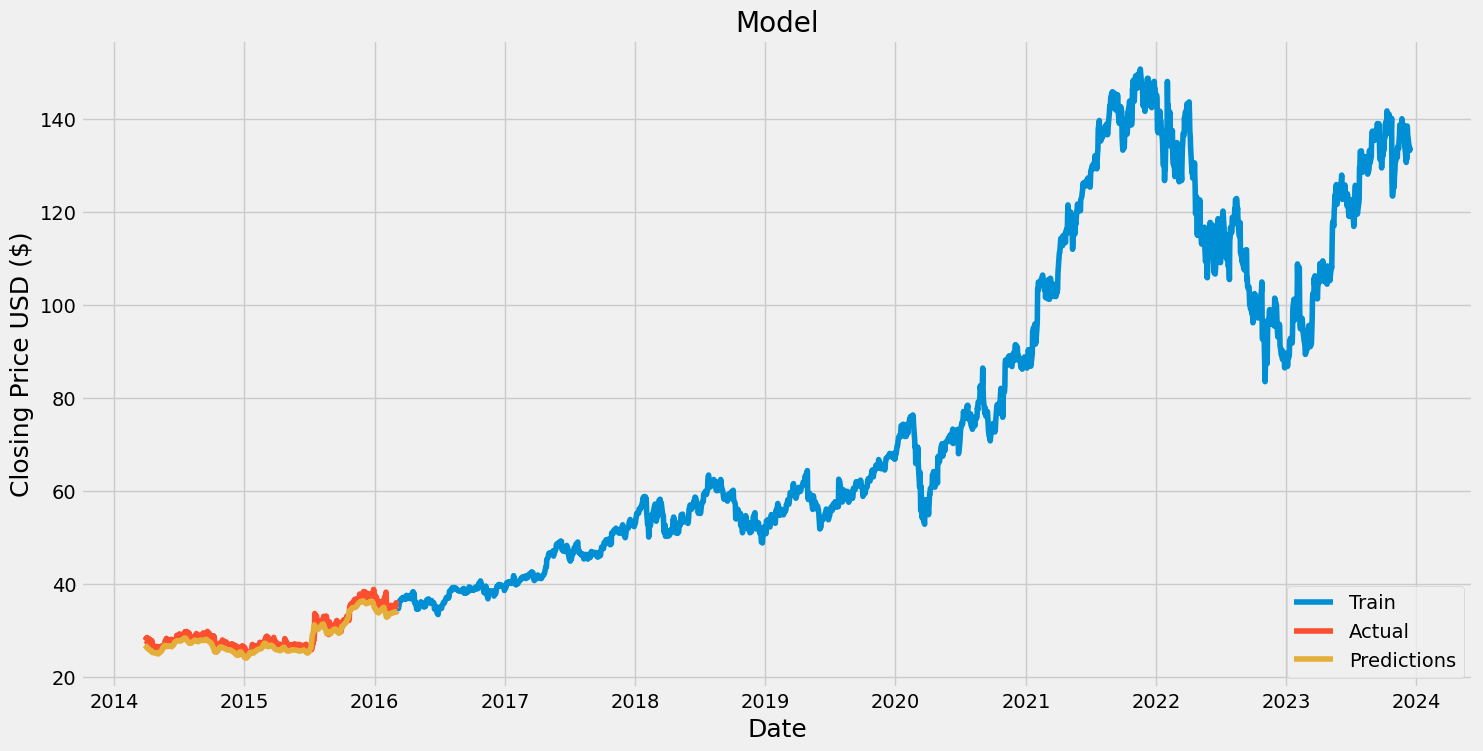

In [73]:
# Plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Actual')  # Plot actual closing prices from validation data
plt.plot(valid['Predictions'], label='Predictions')  # Plot predicted closing prices
plt.legend(loc='lower right')
plt.show()

In [69]:
#Show the value and predicted prices
valid

,Close,Predictions
Date,,
2016-03-04,35.5445,34.188385
2016-03-03,35.6210,34.019482
2016-03-02,35.9425,33.944023
2016-03-01,35.9405,33.962475
2016-02-29,34.8885,34.029892
...,...,...
2014-04-02,28.3500,26.313398
2014-04-01,28.3580,26.486404
2014-03-31,27.8485,26.659546


In [70]:
#Get the quote
goog_quote = web.DataReader('GOOG', data_source = 'stooq', start='2012-01-01', end='2023-12-17')
new_df = goog_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

#Create empty list
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 36ms/step
[[26.8517]]


In [71]:
goog_quote2 = web.DataReader('GOOG', data_source = 'stooq', start='2012-01-01', end='2023-12-26')
print(goog_quote2['Close'])

Date
2023-12-26    142.8200
2023-12-22    142.7200
2023-12-21    141.8000
2023-12-20    139.6600
2023-12-19    138.1000
                ...   
2014-04-02     28.3500
2014-04-01     28.3580
2014-03-31     27.8485
2014-03-28     27.9995
2014-03-27     27.9230
Name: Close, Length: 2455, dtype: float64
